# Exploring Environmental Dynamics in South Asia

# Summary:
This project analyzes environmental indicators across selected South Asian countries (Bangladesh, Bhutan, India, Nepal, Pakistan, and Sri Lanka) to explore trends and relationships among renewable energy consumption, forest area, and air pollution. Using publicly available datasets from Kaggle, extensive data preprocessing was performed, including handling missing values, converting object data types to numeric, and filtering relevant columns for analysis.

The analysis involved several key steps:

**Data Cleaning and Preparation:** Columns with excessive missing data were dropped, and numerical columns were imputed with mean values to address missing entries.

**Exploratory Data Analysis (EDA):** Visualizations, including bar plots and line plots, were created to observe CO2 emissions, renewable energy usage, and air pollution trends over time. A heatmap was used to examine the correlations among variables.

**Regression Analysis:** An Ordinary Least Squares (OLS) regression model was constructed to explore the relationships between forest area, renewable energy consumption, and population growth. Key findings highlight the critical role of renewable energy in promoting environmental sustainability and the challenges posed by rapid population growth.

The findings underscore the interplay between renewable energy consumption, environmental conservation, and population dynamics in South Asia. Renewable energy showed a positive correlation with forest area, while population growth exhibited a negative influence. The project provides a foundation for further investigations into sustainable development policies, emphasizing the importance of renewable energy and forest conservation in combating climate challenges in the region


# Importing Libraries and Fetching Data

In [4]:
import pandas as pd       # linear algebra
import numpy as np        # data processing
import seaborn as sns     # data visualisation
import matplotlib.pyplot as plt

# Loading Datasets
data= pd.read_csv('C:/Users/HP/Downloads/archive/South_Asian_dataset.csv')

# Previewing Datasets
display (data.head())         # Displaying the First 5 Rows
display (data.columns)        # Listing Column Names
data.info()                   # Basic Overview of Dataset


,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..


Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)',
       'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)',
       'Gini index', 'Population, total', 'Population growth (annual %)',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'School enrollment, primary (% gross)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Carbon dioxide (CO2) emissions excluding LU

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

# Data Cleaning and Preprocessing

In [6]:
columns_with_periods=data.columns[(data == '..').any()]         # Checking Columns With Only Periods '..'
display(columns_with_periods)
data.replace('..', np.NaN, inplace=True)                       # Replacing the '..' with NaN Values

missing_data= data.isnull().sum()                # Checking For Missing Values in each column
display(missing_data[missing_data>0])

missing_percentage=data.isnull().sum()/len(data)*100       # Identifying Percentage of Missing Data   
display(missing_percentage[missing_percentage>0])

threshold=50                   # Setting Threshold to 50% for Column Amputation that Contains Excessive Missing Data

data_cleaned= data.drop(columns=missing_percentage[missing_percentage>threshold].index)    # Dropping columns
display(data_cleaned)

Index(['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'School enrollment, primary (% gross)',
       'Access to electricity (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Forest area (% of land area)',
       'Control of Corruption: Percentile Rank',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
       'Voice and Accoun

GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)           150
Life expectancy at birth, total (years)                                         8
Mortality rate, infant (per 1,000 live births)                                  8
Literacy rate, adult total (% of people ages 15 and above)                    131
School enrollment, primary (% gross)                                           26
Access to electr

GDP (current US$)                                                              1.041667
GDP growth (annual %)                                                          1.562500
GDP per capita (current US$)                                                   1.041667
Inflation, consumer prices (annual %)                                          4.687500
Foreign direct investment, net inflows (% of GDP)                              2.604167
Trade (% of GDP)                                                              26.562500
Gini index                                                                    78.125000
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)           78.125000
Life expectancy at birth, total (years)                                        4.166667
Mortality rate, infant (per 1,000 live births)                                 4.166667
Literacy rate, adult total (% of people ages 15 and above)                    68.229167
School enrollment, primary (% gr

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),"Population, total",...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,19542982,...,0.054812515,64.76727982,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,NaN
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,19688632,...,0.050196479,64.59757272,45.6,1.852781994,NaN,NaN,NaN,NaN,NaN,0.00472257
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,21000256,...,0.046328007,64.41688801,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,22645130,...,0.04675619,64.17623142,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,23553551,...,0.039875091,63.82660868,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Pakistan,2019,3.209090e+11,2.497637,1437.165833,4.830,10.578362,0.696146,28.905576,223293280,...,0.875344301,52.8571977,45.9,4.886934413,20.95238113,-2.251637459,-0.687235057,-0.688234627,-0.862723053,17.0709
188,Pakistan,2020,3.004260e+11,-1.274087,1322.314785,6.162,9.739993,0.684695,26.716280,227196741,...,0.85371295,42.99817342,42.7,4.833307389,21.90476227,-1.792646289,-0.764765918,-0.712482035,-0.877666116,18.9348
189,Pakistan,2021,3.485170e+11,6.513886,1506.108293,6.338,9.496211,0.616039,27.030422,231402117,...,0.933715745,NaN,41.6,4.779680365,23.33333397,-1.713656187,-0.761585534,-0.658457339,-0.841158211,24.9775
190,Pakistan,2022,3.747880e+11,4.767540,1589.263980,5.548,19.873860,0.390087,33.040373,235824862,...,0.845245486,NaN,NaN,NaN,22.64151001,-1.900261998,-0.886412621,-0.672492206,-0.862237751,32.9486


In [7]:
# Identifying object columns to Convert into numeric columns

object_columns= data_cleaned.select_dtypes('object').columns     # Selecting object columns
columns_to_convert= object_columns.drop('Country')               # Excluding the column I don't want to convert

#Convert specified columns to numeric
data_cleaned[columns_to_convert]= data_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')
data_cleaned.info()
display (data_cleaned)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),"Population, total",...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,19542982,...,0.054813,64.767280,45.0,1.852782,4.787234,-2.438969,-2.080253,-1.780661,-2.031417,NaN
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,19688632,...,0.050196,64.597573,45.6,1.852782,NaN,NaN,NaN,NaN,NaN,0.004723
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,21000256,...,0.046328,64.416888,37.8,1.852782,4.761905,-2.035034,-1.811546,-1.673473,-1.433421,0.004561
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,22645130,...,0.046756,64.176231,36.7,1.852782,4.761905,-2.198372,-1.463108,-1.558294,-1.177571,0.087891
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,23553551,...,0.039875,63.826609,44.2,1.852782,6.403941,-2.295682,-1.511549,-1.693925,-1.203034,0.105809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Pakistan,2019,3.209090e+11,2.497637,1437.165833,4.830,10.578362,0.696146,28.905576,223293280,...,0.875344,52.857198,45.9,4.886934,20.952381,-2.251637,-0.687235,-0.688235,-0.862723,17.070900
188,Pakistan,2020,3.004260e+11,-1.274087,1322.314785,6.162,9.739993,0.684695,26.716280,227196741,...,0.853713,42.998173,42.7,4.833307,21.904762,-1.792646,-0.764766,-0.712482,-0.877666,18.934800
189,Pakistan,2021,3.485170e+11,6.513886,1506.108293,6.338,9.496211,0.616039,27.030422,231402117,...,0.933716,NaN,41.6,4.779680,23.333334,-1.713656,-0.761586,-0.658457,-0.841158,24.977500
190,Pakistan,2022,3.747880e+11,4.767540,1589.263980,5.548,19.873860,0.390087,33.040373,235824862,...,0.845245,NaN,NaN,NaN,22.641510,-1.900262,-0.886413,-0.672492,-0.862238,32.948600


In [8]:
# Defining Numeric Column
numeric_columns= data_cleaned.select_dtypes(include=[np.number]).columns

# Getting Summary Statistics of Numeric Columns
summary= data_cleaned.describe()      
display(summary)

# Filling NaN values with Median as most of the Data are skewed and do not follow a pattern.
for column in numeric_columns:      
    mean_value= data_cleaned[column].mean ()
    data_cleaned[column].fillna(mean_value, inplace=True)
remained_missing_data = data_cleaned.isnull().sum()
display(remained_missing_data)
data_cleaned.info()

,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),"Population, total",Population growth (annual %),...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
count,192.000000,1.900000e+02,189.000000,190.000000,192.000000,183.000000,187.000000,141.000000,1.920000e+02,192.000000,...,184.000000,168.000000,179.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,173.000000
mean,2011.500000,2.910099e+11,5.065082,2161.422299,6.287391,6.623532,1.913846,49.525213,2.110938e+08,1.691994,...,1.091878,46.245076,47.202793,24.149707,33.954310,-0.960264,-0.633873,-0.483059,-0.506034,17.503976
std,6.940284,6.701374e+11,6.265406,2465.328490,3.204121,5.606191,2.959802,21.645193,4.053449e+08,1.130467,...,1.064332,19.818578,27.700938,22.130777,23.564439,1.154907,0.478759,0.642758,0.521447,21.026589
min,2000.000000,4.607334e+08,-32.908829,142.903364,0.398000,-6.811161,-0.638806,21.459969,2.825070e+05,-0.651321,...,0.039875,10.808561,1.200000,1.852782,0.473934,-2.810035,-2.080253,-1.922500,-2.031417,0.004561
25%,2005.750000,5.291861e+09,3.525153,632.294526,4.045750,3.747312,0.434715,32.514632,1.427913e+07,0.999985,...,0.344144,26.689906,31.050000,4.268094,17.500000,-1.841675,-0.908290,-0.843231,-0.879868,2.436910
50%,2011.500000,3.066091e+10,5.456388,1250.093340,5.839000,5.702070,0.879517,44.642411,2.742371e+07,1.368307,...,0.770182,52.576154,45.900000,18.742979,30.238095,-1.078778,-0.641796,-0.531281,-0.500677,8.260000
75%,2017.250000,1.931948e+11,7.123428,2689.319415,8.384250,8.356711,1.695962,55.710589,1.670127e+08,2.163591,...,1.475858,62.023257,68.650000,35.991531,44.790941,-0.158176,-0.374301,0.020161,-0.123003,24.800000
max,2023.000000,3.549920e+12,37.687192,12667.435670,14.386000,49.721102,16.783473,108.157795,1.428628e+09,7.541019,...,5.323969,79.037396,92.000000,71.501311,93.333336,1.284487,0.987187,0.672035,0.462193,86.840300


C:\Users\HP\AppData\Local\Temp\ipykernel_17772\3216581948.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(mean_value, inplace=True)


Country                                                                       0
Year                                                                          0
GDP (current US$)                                                             0
GDP growth (annual %)                                                         0
GDP per capita (current US$)                                                  0
Unemployment, total (% of total labor force) (modeled ILO estimate)           0
Inflation, consumer prices (annual %)                                         0
Foreign direct investment, net inflows (% of GDP)                             0
Trade (% of GDP)                                                              0
Population, total                                                             0
Population growth (annual %)                                                  0
Life expectancy at birth, total (years)                                       0
Mortality rate, infant (per 1,000 live b

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           192 non-null    float64
 3   GDP growth (annual %)                                                       192 non-null    float64
 4   GDP per capita (current US$)                                                192 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

# Exploratory Data Analysis (EDA)
### Environmental Comparison Between Countries

In [10]:
# Excluding Afghanistan and Maldives as this notebook works in regard of Bangladesh, Nepal, Bhutan, Sri Lanka, India and Pakistan.

exclude_countries=['Afghanistan', 'Maldives']
data_cleaned=data_cleaned[~data_cleaned['Country'].isin(exclude_countries)]
data_cleaned

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),"Population, total",...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
24,Bhutan,2000,4.607334e+08,3.355068,784.618403,1.652,4.012121,1.913846,74.026497,587207,...,0.719678,32.573840,91.400000,65.477387,71.276596,0.491937,-0.428554,0.130426,-1.112357,0.400944
25,Bhutan,2001,4.961102e+08,7.328374,822.417546,1.900,3.414789,1.913846,71.094575,603234,...,0.752279,32.916007,90.200000,65.726859,33.954310,-0.960264,-0.633873,-0.483059,-0.506034,0.864629
26,Bhutan,2002,5.593453e+08,10.443780,903.557178,1.851,2.455357,0.433616,70.283317,619048,...,0.791700,33.344182,89.700000,65.976332,70.899467,0.693676,-0.508571,0.069402,-1.290271,1.675800
27,Bhutan,2003,6.519354e+08,7.786561,1027.273391,1.800,2.572309,0.516970,72.849901,634627,...,0.796058,33.751263,89.700000,66.225804,82.010582,0.918949,-0.048716,0.136126,-1.146782,2.436910
28,Bhutan,2004,7.353485e+08,5.157257,1131.321034,2.490,4.105937,1.204859,89.060552,649991,...,0.788626,34.030145,90.900000,69.410394,80.788177,1.172050,-0.915191,0.223591,-0.965037,3.156980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Pakistan,2019,3.209090e+11,2.497637,1437.165833,4.830,10.578362,0.696146,28.905576,223293280,...,0.875344,52.857198,45.900000,4.886934,20.952381,-2.251637,-0.687235,-0.688235,-0.862723,17.070900
188,Pakistan,2020,3.004260e+11,-1.274087,1322.314785,6.162,9.739993,0.684695,26.716280,227196741,...,0.853713,42.998173,42.700000,4.833307,21.904762,-1.792646,-0.764766,-0.712482,-0.877666,18.934800
189,Pakistan,2021,3.485170e+11,6.513886,1506.108293,6.338,9.496211,0.616039,27.030422,231402117,...,0.933716,46.245076,41.600000,4.779680,23.333334,-1.713656,-0.761586,-0.658457,-0.841158,24.977500
190,Pakistan,2022,3.747880e+11,4.767540,1589.263980,5.548,19.873860,0.390087,33.040373,235824862,...,0.845245,46.245076,47.202793,24.149707,22.641510,-1.900262,-0.886413,-0.672492,-0.862238,32.948600


In [11]:
# Relevant columns for environmental and climate comparison
env_columns= [
    'Country', 'Year', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Forest area (% of land area)',
    'Access to electricity (% of population)','Population growth (annual %)']
env_data= data_cleaned[env_columns]
env_data.head ()

,Country,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Access to electricity (% of population),Population growth (annual %)
24,Bhutan,2000,0.719678,32.573840,91.4,65.477387,31.2,2.800570
25,Bhutan,2001,0.752279,32.916007,90.2,65.726859,40.2,2.692778
26,Bhutan,2002,0.791700,33.344182,89.7,65.976332,44.1,2.587763
27,Bhutan,2003,0.796058,33.751263,89.7,66.225804,41.1,2.485461
28,Bhutan,2004,0.788626,34.030145,90.9,69.410394,51.9,2.392109


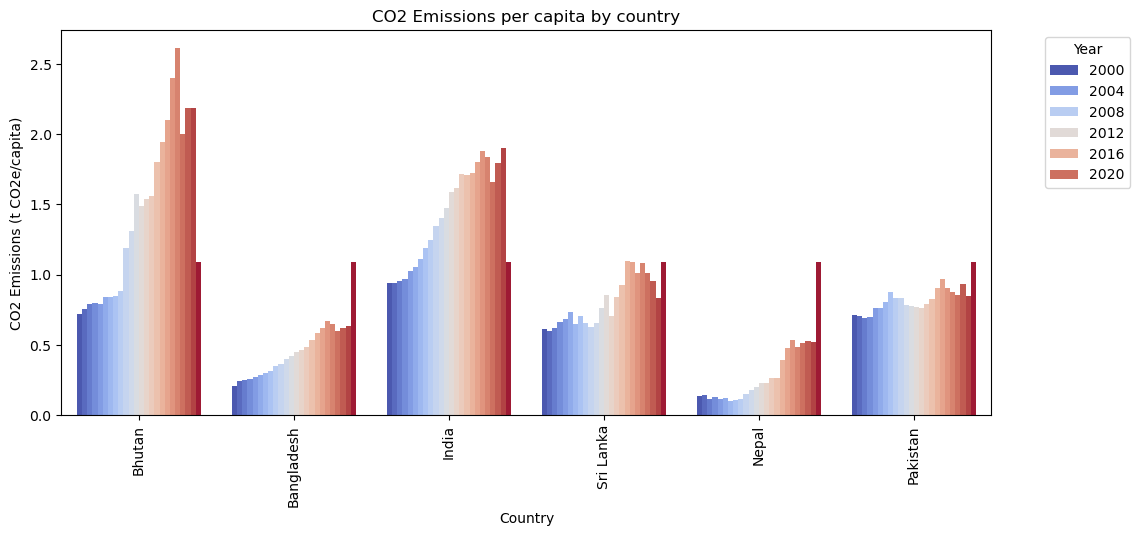

In [12]:
# Bar Plot: CO2 Emmisions over time by Country (per capita)

plt.figure(figsize=(12,5))
sns.barplot(x='Country', y='Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
            hue='Year', palette='coolwarm', data=env_data)
plt.xticks(rotation=90)
plt.title('CO2 Emissions per capita by country')
plt.ylabel('CO2 Emissions (t CO2e/capita)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


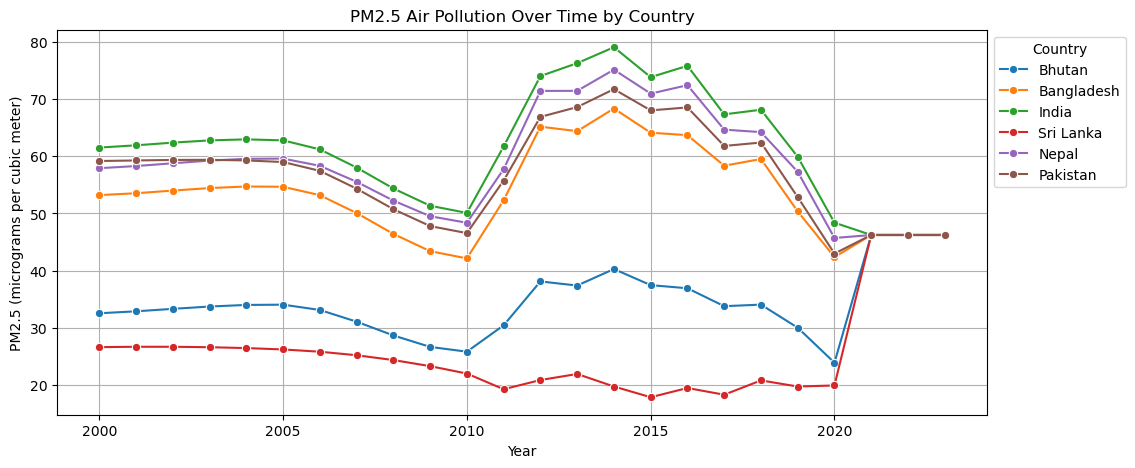

In [13]:
# Line Plot: Air pollution over time by country
plt.figure(figsize=(12, 5))
sns.lineplot(data=env_data, x='Year', y='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
             hue='Country', marker='o')
plt.title('PM2.5 Air Pollution Over Time by Country')
plt.xlabel('Year')
plt.ylabel('PM2.5 (micrograms per cubic meter)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

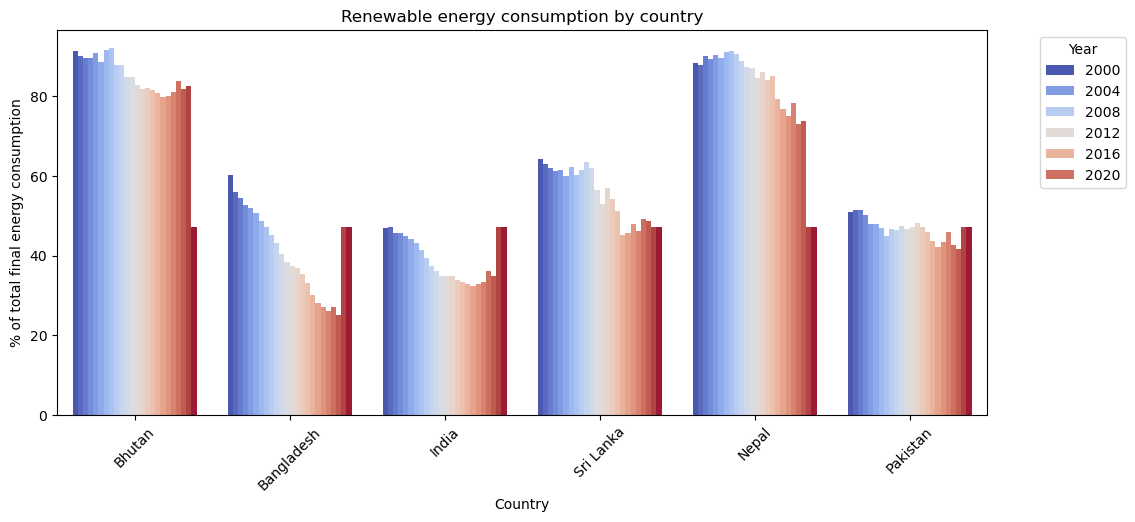

In [14]:
# Bar plot: Renewable Energy Consumption over timeby country

plt.figure(figsize=(12,5))
sns.barplot(x='Country', y='Renewable energy consumption (% of total final energy consumption)',
            hue='Year', palette='coolwarm', data=env_data)
plt.xticks(rotation=45)
plt.title('Renewable energy consumption by country')
plt.ylabel('% of total final energy consumption')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show ()

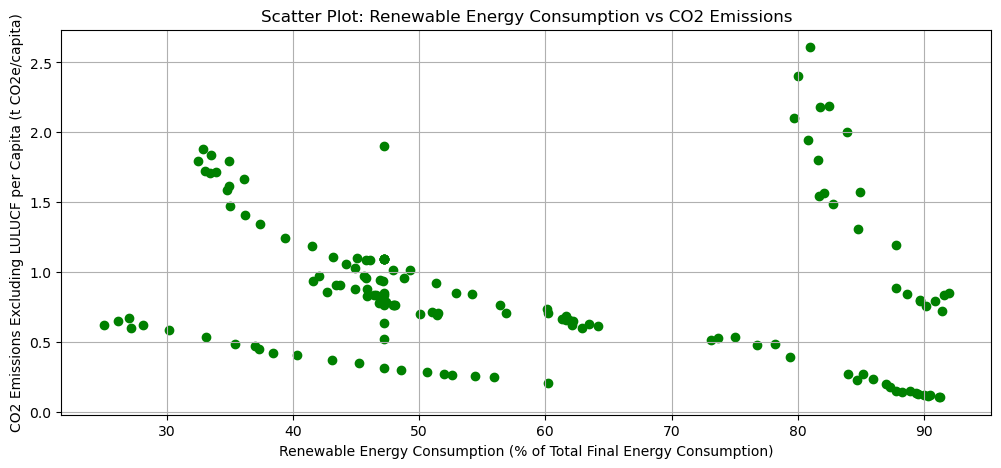

In [15]:
# Creating the scatter plot between Renewable Energy and CO2 Emmissions
plt.figure(figsize=(12, 5))
plt.scatter(data_cleaned['Renewable energy consumption (% of total final energy consumption)'],
            data_cleaned['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'],
            alpha=1, color= 'green')
plt.xlabel('Renewable Energy Consumption (% of Total Final Energy Consumption)')
plt.ylabel('CO2 Emissions Excluding LULUCF per Capita (t CO2e/capita)')
plt.title('Scatter Plot: Renewable Energy Consumption vs CO2 Emissions')
plt.grid(True)
plt.show()


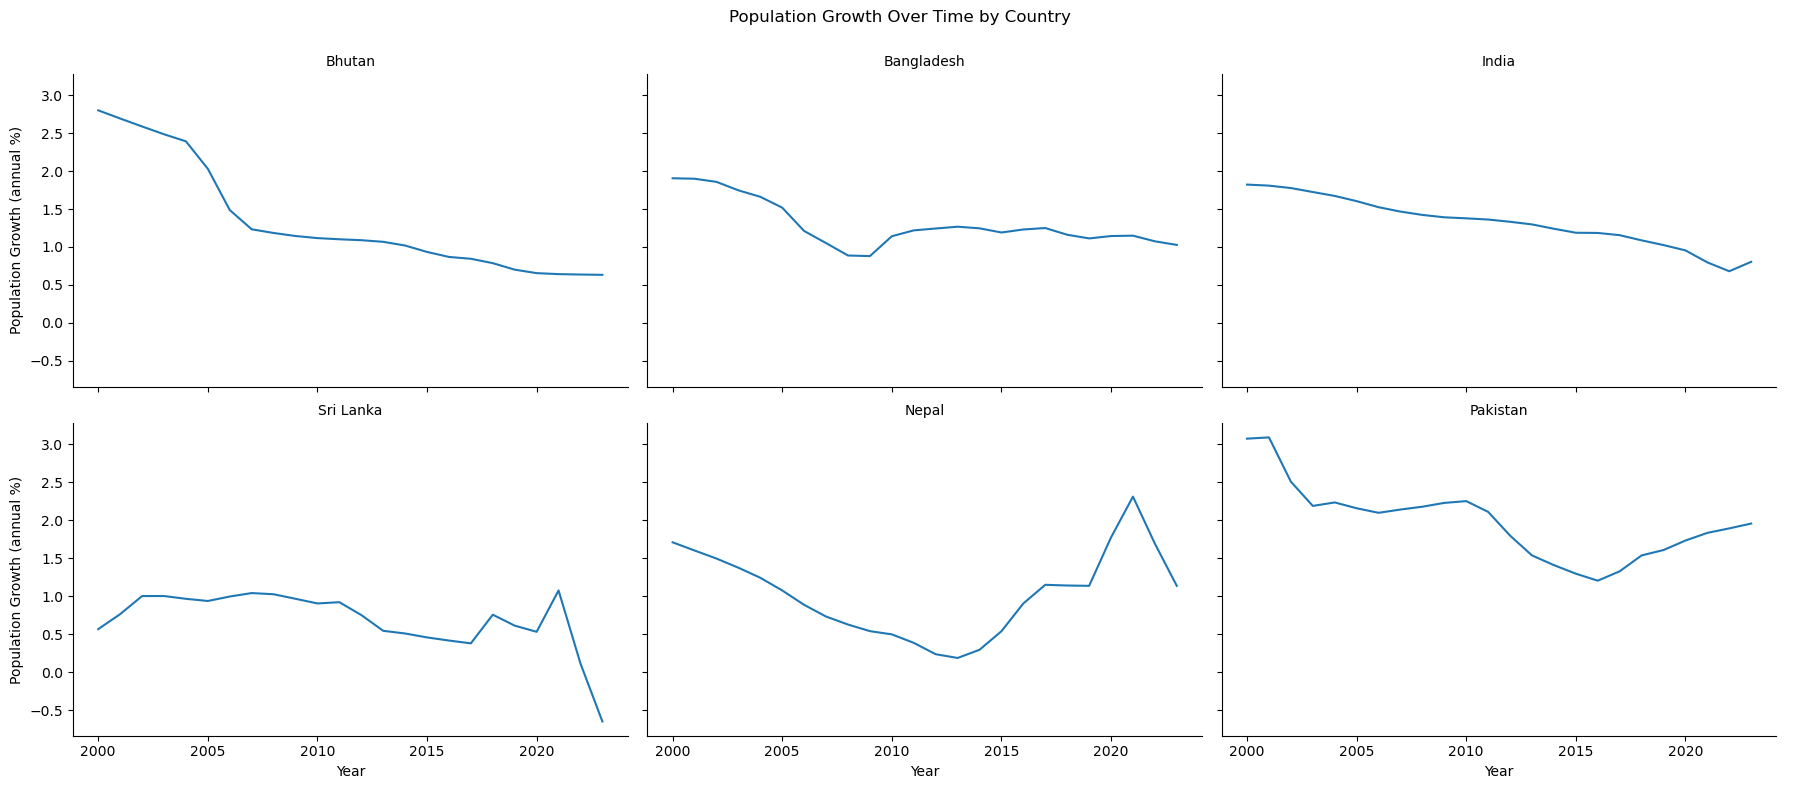

In [16]:
# Creating the FacetGrid for line plots
g = sns.FacetGrid(data_cleaned, col='Country', col_wrap=3, height=4, aspect=1.5)   

# Create a grid of plots, one for each subset of the data.
g.map(sns.lineplot, 'Year', 'Population growth (annual %)')

# Adding titles and labels
g.set_axis_labels('Year', 'Population Growth (annual %)')
g.set_titles(col_template="{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)                                     # Adjust the top of the subplots for the main title.
g.fig.suptitle('Population Growth Over Time by Country')         # Set the main title for the entire plot grid

plt.show()


In [67]:
# Grouping by Country and calculate summary statistics
country_summary = data_cleaned.groupby('Country')['Forest area (% of land area)'].describe()
print("Summary Statistics for Each Country:\n", country_summary)

# Identify the country with the highest and lowest average forest area
highest_forest_area = data_cleaned.groupby('Country')['Forest area (% of land area)'].mean().idxmax()
lowest_forest_area = data_cleaned.groupby('Country')['Forest area (% of land area)'].mean().idxmin()

print(f"Country with Highest Average Forest Area: {highest_forest_area}")
print(f"Country with Lowest Average Forest Area: {lowest_forest_area}")

# Corresponding average values
highest_forest_value = data_cleaned.groupby('Country')['Forest area (% of land area)'].mean().max()
lowest_forest_value = data_cleaned.groupby('Country')['Forest area (% of land area)'].mean().min()

print(f"Highest Average Forest Area: {highest_forest_value}")
print(f"Lowest Average Forest Area: {lowest_forest_value}")

# Calculate the range (max - min) of forest area for each country
country_range = data_cleaned.groupby('Country')['Forest area (% of land area)'].apply(lambda x: x.max() - x.min())
print("Range of Forest Area for Each Country:\n", country_range)

# Ranking with the highest average forest area
top_countries = data_cleaned.groupby('Country')['Forest area (% of land area)'].mean().nlargest(6)
print("Highest Average Forest Area Ranking:\n", top_countries)


Summary Statistics for Each Country:
             count       mean        std        min        25%        50%  \
Country                                                                    
Bangladesh   24.0  15.352393   2.711127  14.468772  14.468772  14.519024   
Bhutan       24.0  66.121166  13.075719  24.149707  68.614247  70.843075   
India        24.0  23.538414   0.519138  22.733495  23.101912  23.508622   
Nepal        24.0  39.847517   4.852628  24.149707  40.800392  41.527496   
Pakistan     24.0   6.877973   5.328761   4.779680   5.080570   5.337545   
Sri Lanka    24.0  33.231306   2.811450  24.149707  33.735608  34.076471   

                  75%        max  
Country                           
Bangladesh  14.660316  24.149707  
Bhutan      71.233155  71.501311  
India       24.023826  24.359829  
Nepal       41.590722  41.590722  
Pakistan     5.648981  24.149707  
Sri Lanka   34.266801  34.546643  
Country with Highest Average Forest Area: Bhutan
Country with Lowest Aver

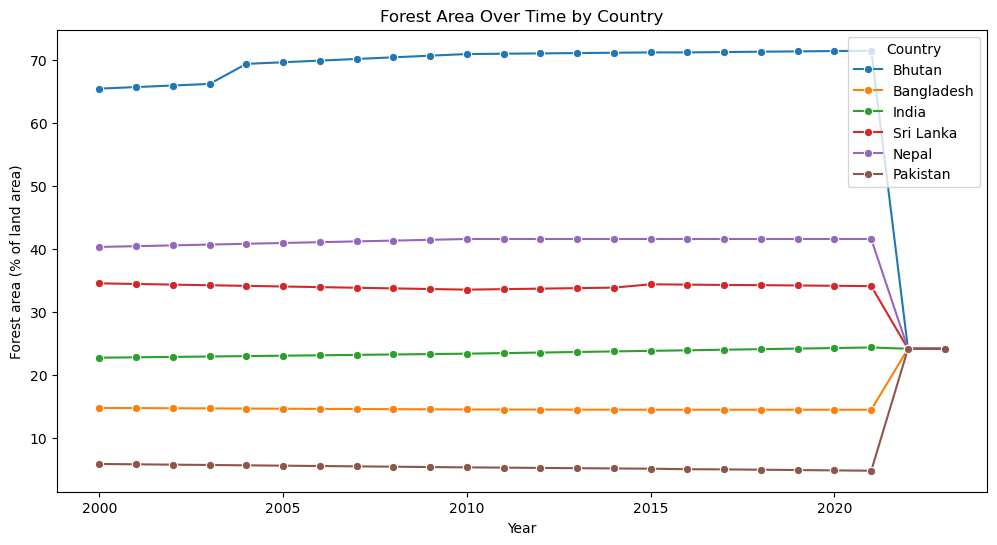

In [19]:
# Line plot to visualize trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned, x='Year', y='Forest area (% of land area)', hue='Country', marker='o')
plt.title('Forest Area Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Forest area (% of land area)')
plt.legend(title='Country')
plt.show()


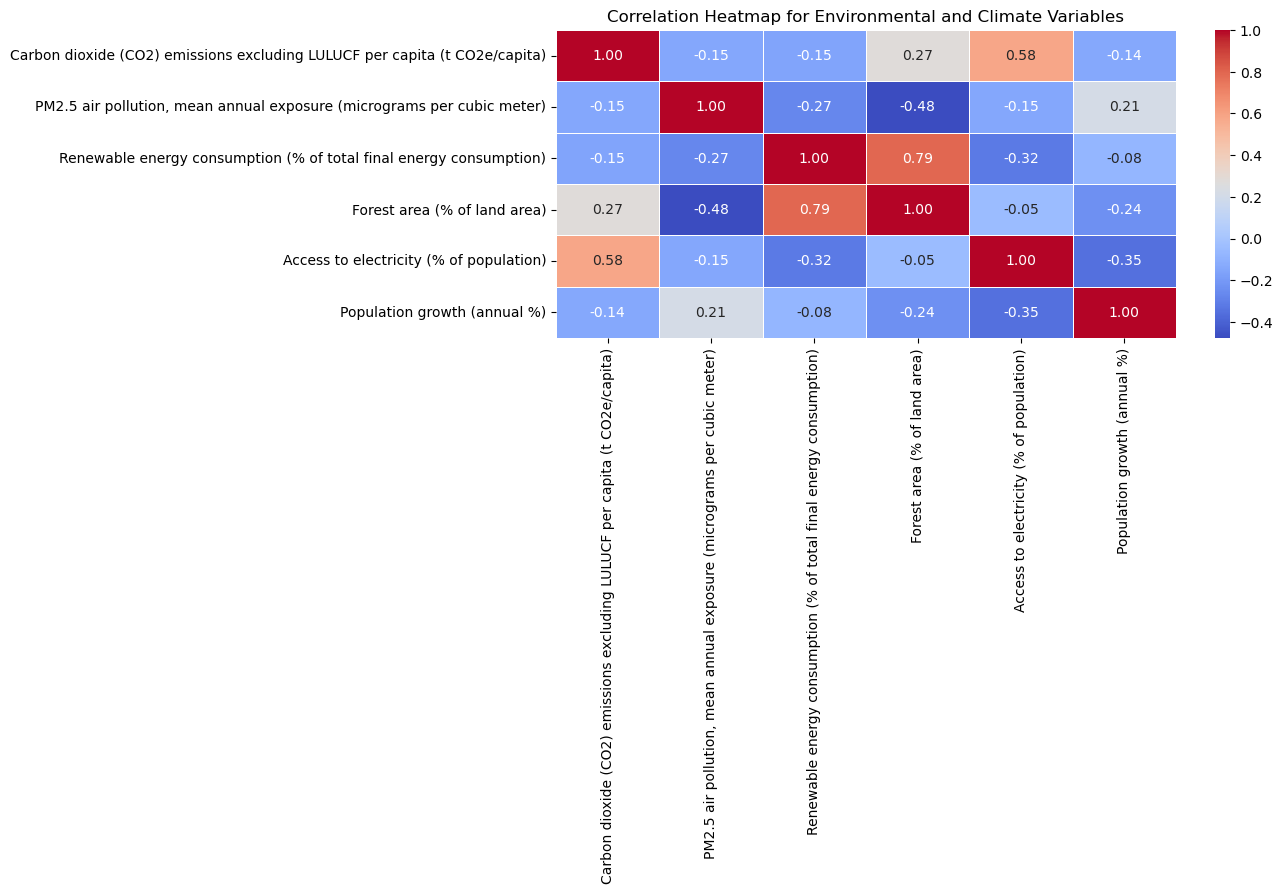

In [20]:
# Correlation Heatmap
'''
Identifying if there's a relationship between environmental variables.
For example, do countries with high renewable energy consumption
also have lower CO2 emissions?
'''

env_data_numeric= env_data.drop(columns= ['Year']).select_dtypes(include= [np.number])      # Excluding Non-Numeric Columns
env_data_corr=env_data_numeric.corr ()
plt.figure(figsize= (10,4))
sns.heatmap(env_data_corr, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths= 0.5)
plt.title ('Correlation Heatmap for Environmental and Climate Variables')
plt.show ()

# Ordinary Least Squares (OLS) Regression using Statsmodels

In [22]:
'''
The OLS (Ordinary Least Square) is to understand the relationships between variables
(e.g., how factors significantly affect Forest Area)
'''
import statsmodels.api as sm

In [23]:
# Selecting relevant columns for OLS Regression
ols_data = data_cleaned[['Renewable energy consumption (% of total final energy consumption)',
                         'Forest area (% of land area)', 'Population growth (annual %)']]

# Defining Dependent (Y) and Independent (X) Variables
y= ols_data['Forest area (% of land area)']          

x= ols_data[['Renewable energy consumption (% of total final energy consumption)',
             'Population growth (annual %)' ]]      # Independent Variables

# Adding a constant column to X along with the other independent variables
x= sm.add_constant(x)

'''
Adding an Intercept to the Regression model is Crucial because it
represents the expected value of dependent variable when all independent variables are zero.
'''

model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Forest area (% of land area)   R-squared:                       0.659
Model:                                      OLS   Adj. R-squared:                  0.654
Method:                           Least Squares   F-statistic:                     136.3
Date:                          Thu, 26 Dec 2024   Prob (F-statistic):           1.13e-33
Time:                                  22:22:22   Log-Likelihood:                -559.05
No. Observations:                           144   AIC:                             1124.
Df Residuals:                               141   BIC:                             1133.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                                                         coef    std err          t      P>|t|

# Variance Inflation Factor (VIF) Analysis

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = ols_data[['Renewable energy consumption (% of total final energy consumption)',
              'Forest area (% of land area)', 'Population growth (annual %)',]]

# Adding Constant Column to Independent Variable 
x= sm.add_constant(x)

# Creating an Emtpy DataFrame to hold the VIF values
vif_data=pd.DataFrame()

# Adding feature names to the DataFrame
vif_data['feature']=x.columns

# Calculating the VIF for each feature
vif_data['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                                             feature        VIF
0                                              const  15.068751
1  Renewable energy consumption (% of total final...   2.786980
2                       Forest area (% of land area)   2.933221
3                       Population growth (annual %)   1.096323


# Predictive Analysis

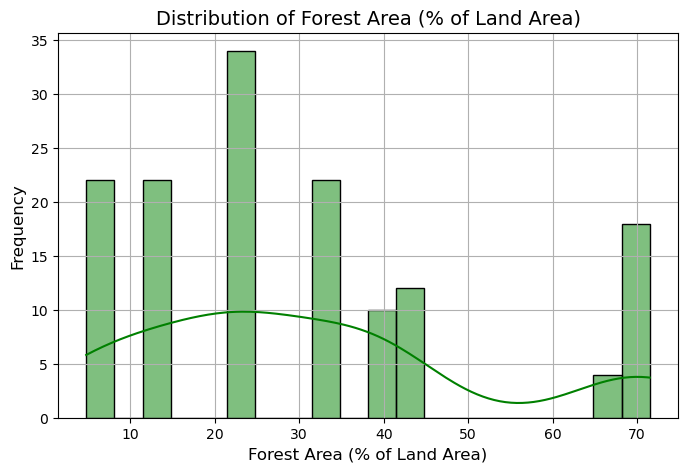

count    144.000000
mean      30.828128
std       20.184374
min        4.779680
25%       14.574312
50%       24.149707
75%       41.242977
max       71.501311
Name: Forest area (% of land area), dtype: float64

In [27]:
'''
Exploring Target Variable
'''
# Analyzing the distribution and basic statistics for the target variable "Forest area (% of land area)"
forest_area_stats = data_cleaned['Forest area (% of land area)'].describe()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Forest area (% of land area)'], kde=True, bins=20, color='green')
plt.title('Distribution of Forest Area (% of Land Area)', fontsize=14)
plt.xlabel('Forest Area (% of Land Area)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

forest_area_stats

In [28]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculating correlation between numerical variables and the target variable
correlation_matrix = numeric_data.corr()
forest_area_correlation = correlation_matrix['Forest area (% of land area)'].sort_values(ascending=False)

# Display the correlations with the target variable
forest_area_correlation


Forest area (% of land area)                                                  1.000000
Trade (% of GDP)                                                              0.837175
Control of Corruption: Percentile Rank                                        0.813494
Political Stability and Absence of Violence/Terrorism: Estimate               0.799517
Renewable energy consumption (% of total final energy consumption)            0.792757
Rule of Law: Estimate                                                         0.659762
School enrollment, primary (% gross)                                          0.343693
GDP per capita (current US$)                                                  0.295572
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)    0.273771
People using at least basic sanitation services (% of population)             0.265143
Individuals using the Internet (% of population)                              0.263082
Life expectancy at birth, total (years)    

In [29]:
'''
Before building Regression Model, We check to ensure there are no multicollinearity
between the predictor variables. So we used Variance Influence Factor to see the VIF
value of each predictor.
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor
reg_mod= data_cleaned[['Trade (% of GDP)', 'Control of Corruption: Percentile Rank',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Renewable energy consumption (% of total final energy consumption)',
        'Rule of Law: Estimate']]
p = reg_mod[['Trade (% of GDP)', 'Control of Corruption: Percentile Rank',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Renewable energy consumption (% of total final energy consumption)',
        'Rule of Law: Estimate']]

# Adding Constant Column to Independent Variable 
p= sm.add_constant(p)

# Creating an Emtpy DataFrame to hold the VIF values
reg_vif_data=pd.DataFrame()

# Adding feature names to the DataFrame
reg_vif_data['feature']=p.columns

# Calculating the VIF for each feature
reg_vif_data['VIF']=[variance_inflation_factor(p.values, i) for i in range(p.shape[1])]

print(reg_vif_data)

                                             feature        VIF
0                                              const  55.490642
1                                   Trade (% of GDP)   3.995581
2             Control of Corruption: Percentile Rank  12.576868
3  Political Stability and Absence of Violence/Te...   3.109008
4  Renewable energy consumption (% of total final...   2.185475
5                              Rule of Law: Estimate   7.794004


In [30]:
'''
Since there are strong multicollinearity between Control of Corruption and Rule of law: Estimate,
we intend to decline the Rule of Estimate variable. Besides, this variable has less correlation value (0.65) than
the other predictor variables. Additionally, this variable has less theoretical value for the analysis than
the rest of the predictors. Therefore, we set the threshold to .70 and took all the positive variables
equal to or above it.
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# selecting features with absolute correlation greater than 0.5
selected_features=forest_area_correlation[forest_area_correlation.abs()>0.7].index.drop('Forest area (% of land area)')

# Creating feature and target datasets
x = data_cleaned[selected_features]
y = data_cleaned['Forest area (% of land area)']

# Splitting into training and testing datasets (80% train, 20% test)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

# Normalize Numerical Variables (Standardization: mean=0, std=1)
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

# Confirm feature selection and dataset sizes
selected_features, x_train_scaled.shape, x_test_scaled.shape

(Index(['Trade (% of GDP)', 'Control of Corruption: Percentile Rank',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Renewable energy consumption (% of total final energy consumption)'],
       dtype='object'),
 (115, 4),
 (29, 4))

In [31]:
# Building Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the linear regression model
model= LinearRegression()
model.fit(x_train_scaled, y_train)

# predicting on the test set
y_pred= model.predict(x_test_scaled)

# evaluating model performance
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
r2= r2_score(y_test, y_pred)

mae, rmse, r2

(3.5697662532208416, 4.223955131421302, 0.9599600344439227)

In [32]:
''' 
Analyze the coefficients of the linear regression model
to understand the impact of each feature on the target variable.
'''
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [4.45715973 1.88076459 6.77819815 9.21681481]
Intercept: 29.84718434750949


In [33]:
''' The Output:
These coefficients represent the change in the target variable for a one-unit change in the respective feature,
assuming all other features remain constant. For instance, a one-unit increase in Feature 1 
is associated with an approximate increase of 3.97 units in the target variable, 
while a one-unit increase in Feature 2 is associated with a decrease of 1.50 units in the target variable.
'''

' The Output:\nThese coefficients represent the change in the target variable for a one-unit change in the respective feature,\nassuming all other features remain constant. For instance, a one-unit increase in Feature 1 \nis associated with an approximate increase of 3.97 units in the target variable, \nwhile a one-unit increase in Feature 2 is associated with a decrease of 1.50 units in the target variable.\n'

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking if there are any multicollinearity left
# Prepare data for VIF calculation

z = data_cleaned[['Control of Corruption: Percentile Rank', 'Trade (% of GDP)',
                  'Political Stability and Absence of Violence/Terrorism: Estimate',
                  'Renewable energy consumption (% of total final energy consumption)']]
z = sm.add_constant(z)
# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = z.columns
vif['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]

print(vif)

                                             Feature        VIF
0                                              const  29.179959
1             Control of Corruption: Percentile Rank   4.871767
2                                   Trade (% of GDP)   3.924165
3  Political Stability and Absence of Violence/Te...   3.097620
4  Renewable energy consumption (% of total final...   1.585134


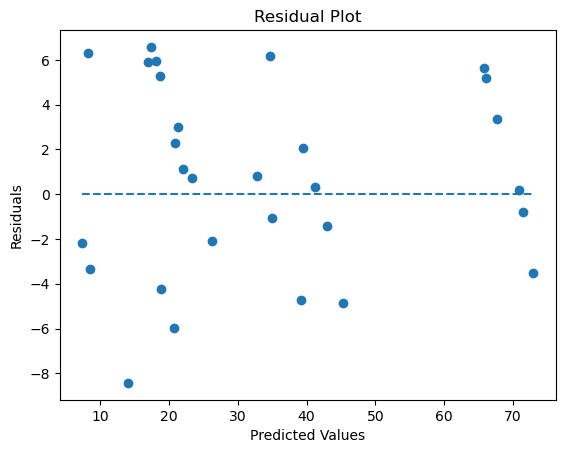

In [35]:
# Residual Analysis
'''
Analyzing the residuals (differences between actual and predicted values)
to check for patterns that might suggest model improvements.
'''
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [36]:
''' The Output:
The above residual plot suggests that the linear regression model has a good fit.
The lack of patterns or trends in the residuals indicates that the model is capturing the linear relationship well.
The uniform spread of residuals and their random scatter around the zero line are also positive signs.
The presence of a few outliers is something to note, but it does not necessarily undermine the overall quality of the model.
'''

' The Output:\nThe above residual plot suggests that the linear regression model has a good fit.\nThe lack of patterns or trends in the residuals indicates that the model is capturing the linear relationship well.\nThe uniform spread of residuals and their random scatter around the zero line are also positive signs.\nThe presence of a few outliers is something to note, but it does not necessarily undermine the overall quality of the model.\n'